In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
from collections import Counter

import tensorflow as tf
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
# Load IMDB data
imdb = tf.keras.datasets.imdb.load_data(
    path='imdb.npz', num_words=None, skip_top=0, maxlen=None, seed=113,
    start_char=1, oov_char=2, index_from=3
)

17465344/17464789 [==============================] - 0s 0us/step


In [4]:
# Load IMDB word index
word_idx = tf.keras.datasets.imdb.get_word_index(
    path='imdb_word_index.json'
)

1646592/1641221 [==============================] - 0s 0us/step


In [14]:
# Extract train and test data
X_train, y_train = imdb[0][0], imdb[0][1]
X_test, y_test = imdb[1][0], imdb[1][1]

X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

print((y == 1).sum(), 'positive reviews')
list(map(len, X_test[y_train == 1])list(map(len, X_test[y_train == 1])print((y == 0).sum(), 'negative reviews')

25000 positive reviews
25000 negative reviews


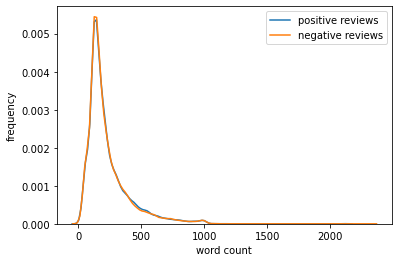

In [49]:
# Find the most frequent review lengths
len_pos = list(map(len, X_test[y_train == 1]))
len_neg = list(map(len, X_test[y_train == 0]))

# Plot histograms for review lenghts
sns.kdeplot(len_pos, label='positive reviews')
ax = sns.kdeplot(len_neg, label='negative reviews')
_ = ax.set(xlabel='word count', ylabel='frequency')

In [43]:
print('Most frerquent length of positive reviews: {} words ({} reviews)'.format(*Counter(len_pos).most_common(1)[0]))
print('Most frerquent length of negative reviews: {} words ({} reviews)'.format(*Counter(len_neg).most_common(1)[0]))

Most frerquent length of positive reviews: 130 words (100 reviews)
Most frerquent length of negative reviews: 125 words (101 reviews)
